In [1]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='correlations/'
path_nicaea='predictions_nicaea/'
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


Working on bins 1 1


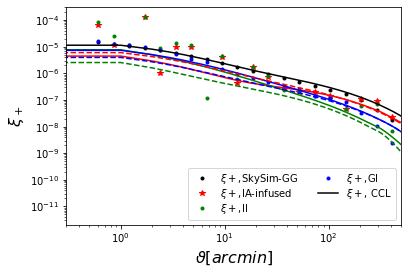

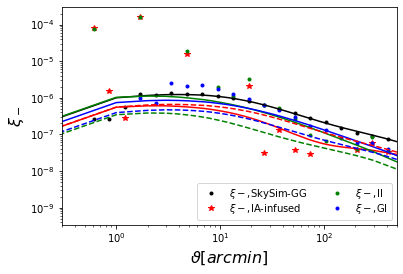

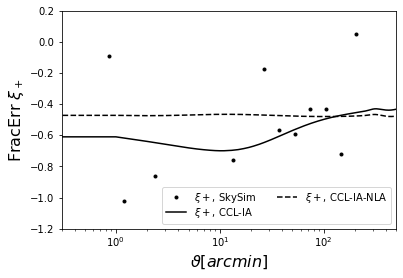

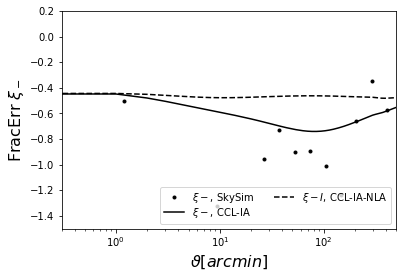

Working on bins 2 2


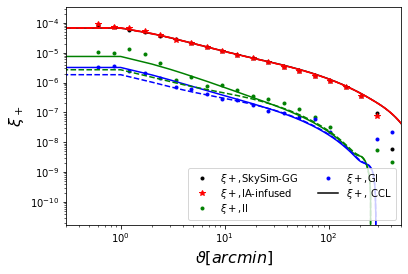

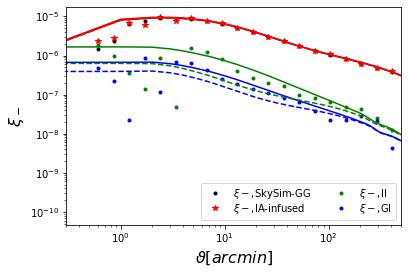

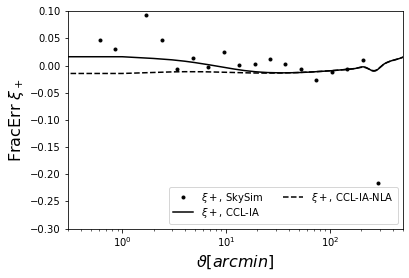

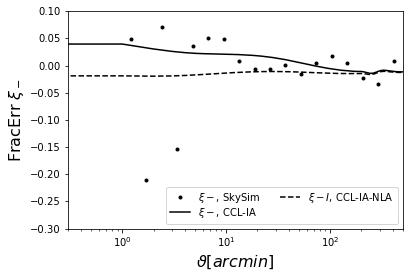

Working on bins 3 3


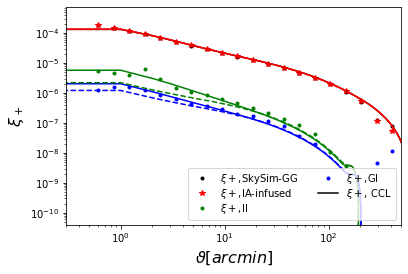

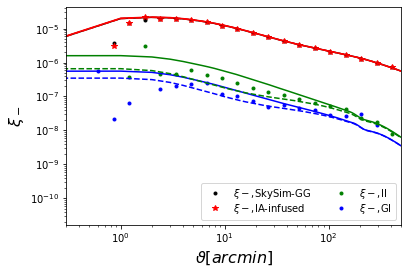

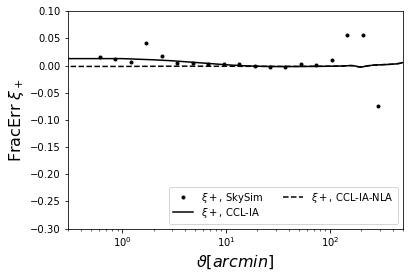

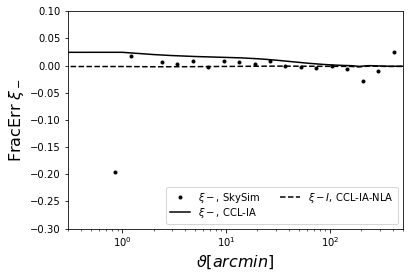

Working on bins 4 4


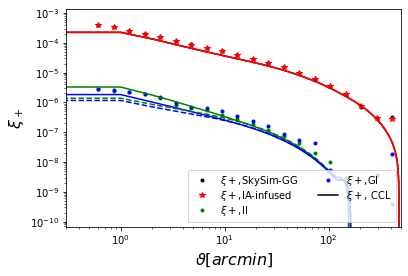

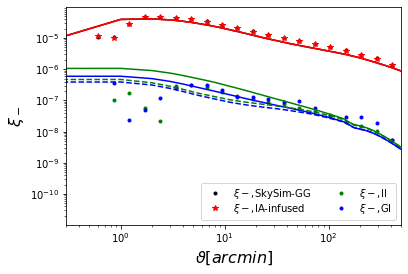

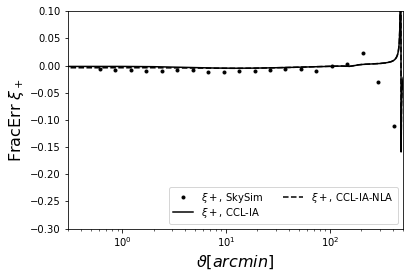

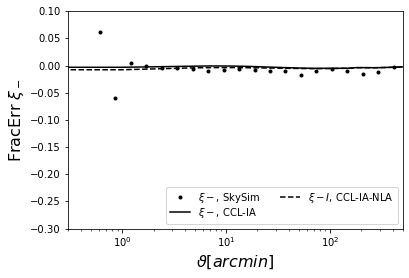

Working on bins 5 5


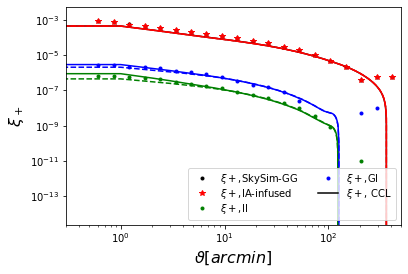

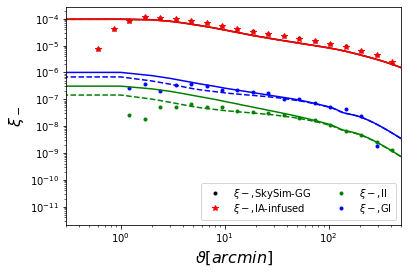

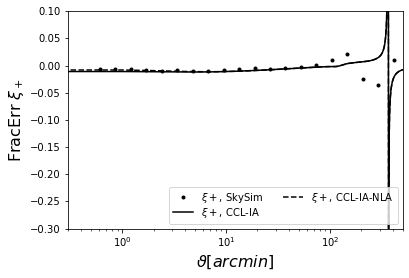

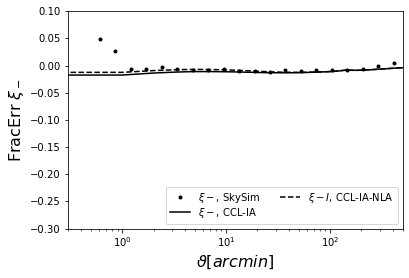

In [9]:
# Select IA model:
#IA_model=0  #NLA
IA_model=1 #delta-NLA
#IA_model=2 #TATT

# Load the CCL predictions:
if(IA_model==0):
    hdul = fits.open('theo_prediction_1.0_0.0_0.0.fits')
elif(IA_model==1):
    hdul = fits.open('theo_prediction_1.0_1.0_0.0_V2.fits')
elif(IA_model==2):
    hdul = fits.open('theo_prediction_1.0_1.0_1.0.fits')       
        
data=hdul[1].data
NO_IA_plus=data['NO IA+'] # Xi + (no ia)
NO_IA_minus=data['NO IA-'] # Xi - (no ia)
GI_plus=data['GI+']        #GI + (TATT) 
GI_minus=data['GI-']       #GI - (TATT)
GI_NLA_plus=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus=data['GI_NLA-']  #GI - (NLA)
II_plus=data['II+']           #II + (TATT) 
II_minus=data['II-']         #II -   (TATT)
II_NLA_plus=data['II_NLA+']  #II +   (NLA)
II_NLA_minus=data['II_NLA-']     #II -  (NLA)
theta=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Initialize:

Nbins=int(20)
Ntomo=int(5)
Ntomocomb = int(Ntomo*(Ntomo+1)/2);
counter=0
xip=np.empty([Nbins,Ntomocomb])
xim=np.empty([Nbins,Ntomocomb])
xip_IA=np.empty([Nbins,Ntomocomb])
xim_IA=np.empty([Nbins,Ntomocomb])
xip_pureIA=np.empty([Nbins,Ntomocomb])
xim_pureIA=np.empty([Nbins,Ntomocomb])
xip_GI=np.empty([Nbins,Ntomocomb])
xim_GI=np.empty([Nbins,Ntomocomb])

#Define the correlator, for plotting:
gg = treecorr.GGCorrelation(nbins = Nbins, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)

for bin1 in range(1,6):
    for bin2 in range (bin1,bin1+1):
#for bin1 in np.arange(Ntomo)+1:
#    for bin2 in range (bin1,Ntomo+1):

        
        print('Working on bins', bin1, bin2)
 
        # Get Treecorr measurements
        # pure cosmic shear:
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim

        
        # cosmic shear + IA, no shape noise:
        if(IA_model==0):
            filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo{}_{}'.format(bin1,bin2) 
        elif(IA_model==1):
            filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)
        elif(IA_model==2):
            filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_TATT{}_{}'.format(bin1,bin2)
        gg.read(filename_IA)
        xip_IA[:,counter]=gg.xip
        xim_IA[:,counter]=gg.xim

        # pure IA signal, no noise, no cosmic shear:
        if(IA_model==0):
            filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo{}_{}'.format(bin1,bin2) 
        elif(IA_model==1):
            filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)
        elif(IA_model==2):
            filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo_TATT{}_{}'.format(bin1,bin2)
        gg.read(filename_pureIA)
        xip_pureIA[:,counter]=gg.xip
        xim_pureIA[:,counter]=gg.xim

        # GI term, no shape noise
        if(IA_model==0):
            filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo{}_{}'.format(bin1,bin2) 
        elif(IA_model==1):
            filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)
        elif(IA_model==2):
            filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo_TATT{}_{}'.format(bin1,bin2)
        gg.read(filename_GI)
        xip_GI[:,counter]=gg.xip
        xim_GI[:,counter]=gg.xim
        
        theta=gg.meanr     
        
        #Get xi+ theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        theta_nicaea=file_nicaea[:,0]
        xip_nicaea=file_nicaea[:,2]

        #Get xi- theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        xim_nicaea=file_nicaea[:,2]

        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
                
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus[tomo,:]
        xim_CCL=NO_IA_minus[tomo,:]

        if(bin1==bin2):
            IG_plus = GI_plus[tomo,:]
            IG_minus = GI_minus[tomo,:]

            IG_NLA_plus = GI_NLA_plus[tomo,:]
            IG_NLA_minus = GI_NLA_minus[tomo,:]

        else:
            IG_plus = np.zeros_like(GI_plus[tomo,:])
            IG_minus = np.zeros_like(GI_minus[tomo,:])
            
        # Total signal:
        xip_CCL_IA=NO_IA_plus[tomo,:] +GI_plus[tomo,:] +IG_plus + II_plus[tomo,:]
        xim_CCL_IA=NO_IA_minus[tomo,:]+GI_minus[tomo,:]+IG_minus + II_minus[tomo,:]

        xip_CCL_IA_NLA=NO_IA_plus[tomo,:] +GI_NLA_plus[tomo,:] +IG_NLA_plus + II_NLA_plus[tomo,:]
        xim_CCL_IA_NLA=NO_IA_minus[tomo,:]+GI_NLA_minus[tomo,:]+IG_NLA_minus + II_NLA_minus[tomo,:]


        xip_CCL_II=II_plus[tomo,:]
        xim_CCL_II=II_minus[tomo,:]
        xip_CCL_II_NLA=II_NLA_plus[tomo,:]
        xim_CCL_II_NLA=II_NLA_minus[tomo,:]


        xip_CCL_GI=GI_plus[tomo,:]
        xim_CCL_GI=GI_minus[tomo,:]
        xip_CCL_GI_NLA=GI_NLA_plus[tomo,:]
        xim_CCL_GI_NLA=GI_NLA_minus[tomo,:]



        #plot xi+:
        
        # Sims:
        plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$,SkySim-GG')
        plt.plot(theta, xip_IA[:,counter], 'r*', label='$\\xi+$,IA-infused')
        plt.plot(theta, xip_pureIA[:,counter], 'g.', label='$\\xi+$,II')
        plt.plot(theta, -xip_GI[:,counter], 'b.', label='$\\xi+$,GI')

        #CCL:
        plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')
        plt.plot(theta_CCL, xip_CCL_IA, 'r-')#, label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xip_CCL_II, 'g-')#, label='$\\xi+$, CCL-II')
        plt.plot(theta_CCL, -xip_CCL_GI, 'b-')#, label='$\\xi+$, CCL-II')
        plt.plot(theta_CCL, xip_CCL_IA_NLA, 'r--')#, label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xip_CCL_II_NLA, 'g--')#, label='$\\xi+$, CCL-II')
        plt.plot(theta_CCL, -xip_CCL_GI_NLA, 'b--')#, label='$\\xi+$, CCL-II')



        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.show()



        #plot xi-        
        plt.plot(theta, xim[:,counter], 'k.', label='$\\xi-$,SkySim-GG')
        plt.plot(theta, xim_IA[:,counter], 'r*', label='$\\xi-$,IA-infused')
        plt.plot(theta, xim_pureIA[:,counter], 'g.', label='$\\xi-$,II')
        plt.plot(theta, -xim_GI[:,counter], 'b.', label='$\\xi-$,GI')

        plt.plot(theta_CCL, xim_CCL, 'k-')#, label='$\\xi-$, CCL')
        plt.plot(theta_CCL, xim_CCL_IA, 'r-')#, label='$\\xi-$, CCL-IA')
        plt.plot(theta_CCL, xim_CCL_II, 'g-')#, label='$\\xi-$, CCL-II')
        plt.plot(theta_CCL, -xim_CCL_GI, 'b-')#, label='$\\xi-$, CCL-II')       
        plt.plot(theta_CCL, xim_CCL_IA_NLA, 'r--')#, label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xim_CCL_II_NLA, 'g--')#, label='$\\xi+$, CCL-II')
        plt.plot(theta_CCL, -xim_CCL_GI_NLA, 'b--')#, label='$\\xi+$, CCL-II')


        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_-$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.show()
        
        #-------------
        # Plot ratios:
        plt.plot(theta, xip_IA[:,counter]/xip[:,counter]-1, 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta_CCL, xip_CCL_IA/xip_CCL -1 , 'k-', label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xip_CCL_IA_NLA/xip_CCL -1 , 'k--', label='$\\xi+$, CCL-IA-NLA')
        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('FracErr $\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        if (bin1==1) :
            plt.ylim([-1.2, 0.2])
        else:
            plt.ylim([-0.3, 0.1])


        plt.show()
         
        
        plt.plot(theta, xim_IA[:,counter]/xim[:,counter]-1, 'k.', label='$\\xi-$, SkySim')
        plt.plot(theta_CCL, xim_CCL_IA/xim_CCL -1 , 'k-', label='$\\xi-$, CCL-IA')
        plt.plot(theta_CCL, xim_CCL_IA_NLA/xim_CCL -1 , 'k--', label='$\\xi-I $, CCL-IA-NLA')
        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('FracErr $\\xi_-$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        if (bin1==1) :
            plt.ylim([-1.5, 0.2])
        else:
            plt.ylim([-0.3, 0.1])


        plt.show()
         

       
        
        
        counter +=1

